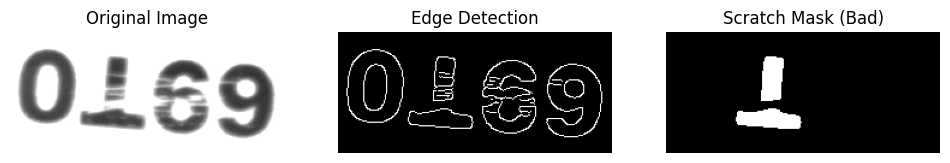

Classification: Bad
Scratch Area: 1294 pixels
Scratch Percentage: 5.62%


'Bad'

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def classify_image(image_path, area_threshold=500):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print("Failed to load the image. Check the file path.")
        return None
    
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian Blur
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Perform adaptive edge detection
    edges = cv2.Canny(blurred, 50, 150)
    
    # Perform morphological operations to close small gaps
    kernel = np.ones((3, 3), np.uint8)
    closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel, iterations=2)
    
    # Find contours of potential scratches
    contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Filter contours based on area to focus on scratches
    scratch_mask = np.zeros_like(gray)
    for contour in contours:
        area = cv2.contourArea(contour)
        if 10 < area < area_threshold:  # Filter small and large non-scratch regions
            cv2.drawContours(scratch_mask, [contour], -1, 255, -1)
    
    # Calculate the percentage of scratch area
    scratch_area = np.sum(scratch_mask > 0)
    total_area = gray.shape[0] * gray.shape[1]
    scratch_percentage = (scratch_area / total_area) * 100

    # Classify based on scratch percentage
    classification = "Bad" if scratch_percentage > 0.5 else "Good"
    
    # Display results
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    
    plt.subplot(1, 3, 2)
    plt.title("Edge Detection")
    plt.imshow(edges, cmap="gray")
    plt.axis("off")
    
    plt.subplot(1, 3, 3)
    plt.title(f"Scratch Mask ({classification})")
    plt.imshow(scratch_mask, cmap="gray")
    plt.axis("off")
    
    plt.show()

    print(f"Classification: {classification}")
    print(f"Scratch Area: {scratch_area} pixels")
    print(f"Scratch Percentage: {scratch_percentage:.2f}%")
    return classification

# Example usage
image_path = "/home/hari07/workspace/intern/anomaly_detection_test_data/anomaly_detection_test_data/bad/03_08_2024_16_54_38.244099_classifier_input.png"  # Replace with your path
classify_image(image_path, area_threshold=800)
